# 19기 Time Series 정규세션 과제

### Electric_Production.csv 데이터를 활용하여 자유롭게 시계열분석을 진행해주세요.
첨부한 '시계열자료_실습.ipynb' 코드를 참고하셔도 좋습니다.


### Box-Jenkins 방법론
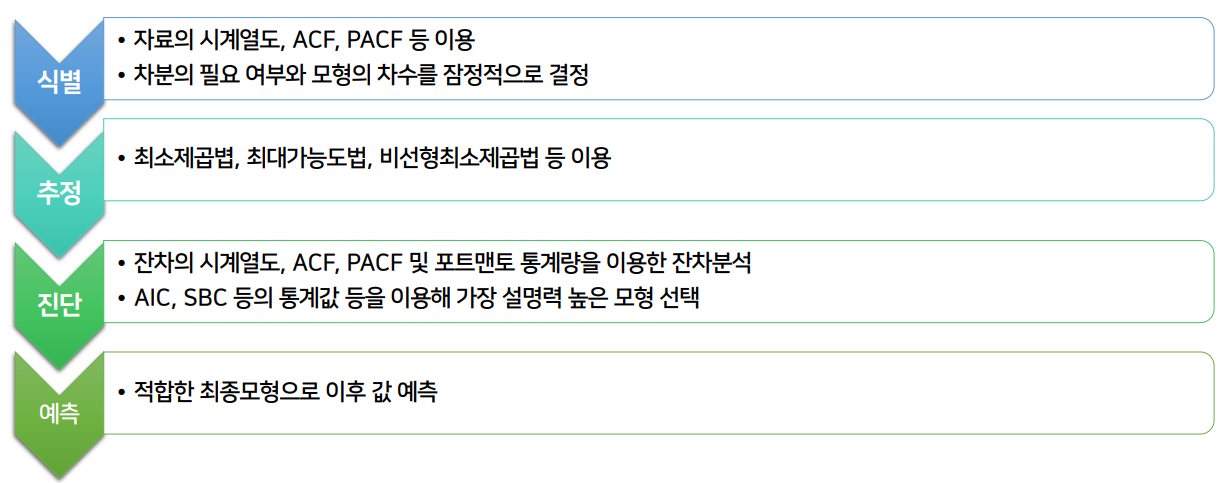

### Prophet
튜토리얼 : https://hyperconnect.github.io/2020/03/09/prophet-package.html

## 라이브러리 불러오기

In [96]:

%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import itertools
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf 
from statsmodels.tsa.seasonal import seasonal_decompose 
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from tqdm import tqdm

## 데이터 불러오기

In [97]:
samsung_df = yf.download('005930.KS',
                      start='2020-01-01',
                      end='2021-04-21',
                      progress=False)

samsung_df = samsung_df[["Close"]]

samsung_df = samsung_df.reset_index()

samsung_df.columns = ['day', 'price']

samsung_df['day'] = pd.to_datetime(samsung_df['day'])

samsung_df['price'] = samsung_df.price.astype(int)

In [98]:
samsung_df_train = samsung_df.iloc[:len(samsung_df)-7]
samsung_df_test = samsung_df.iloc[len(samsung_df)-7:]

### ACF, PACF

In [99]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

/Users/dongjoon/opt/anaconda3/envs/Tobigs/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


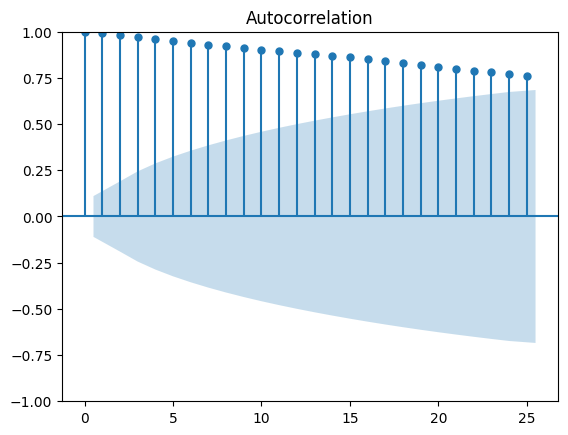

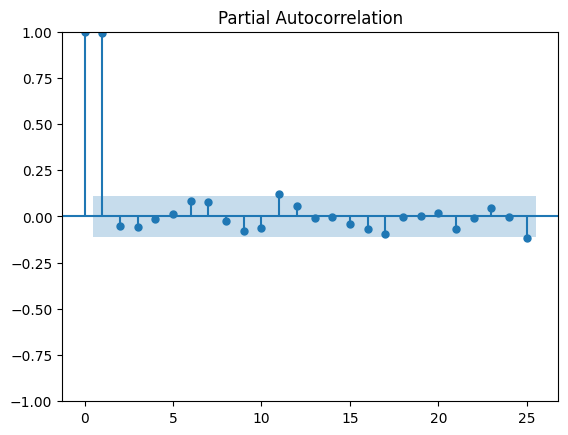

In [100]:
plot_acf(samsung_df_train.price)
plot_pacf(samsung_df_train.price)
plt.show()

### diff

/Users/dongjoon/opt/anaconda3/envs/Tobigs/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


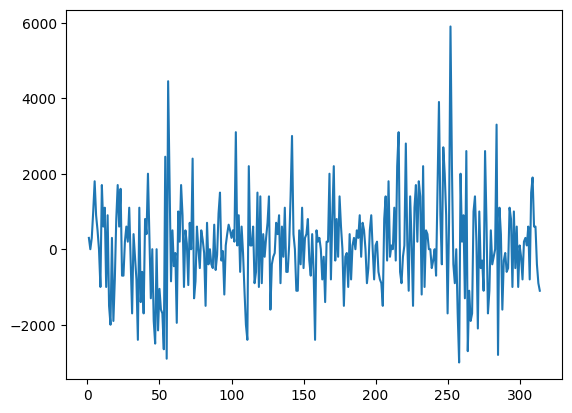

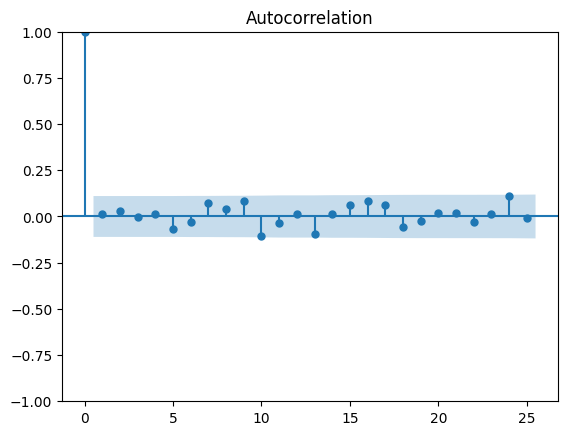

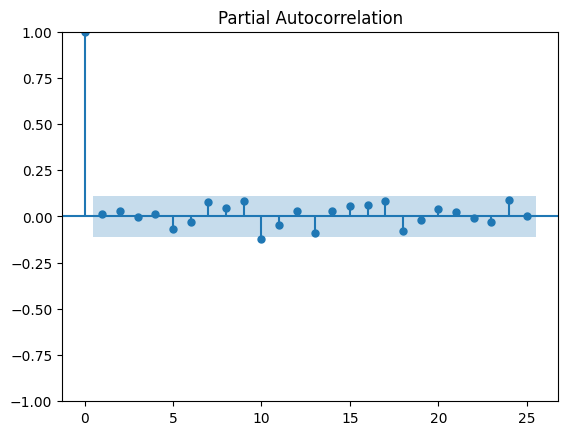

In [101]:
diff_1=samsung_df_train.price.diff(periods=1).iloc[1:]
diff_1.plot()
plot_acf(diff_1)
plot_pacf(diff_1)
plt.show()

In [102]:
model = ARIMA(samsung_df_train["price"], order = (0,1,0))
model_fit = model.fit()
forecast = model_fit.predict(start=len(samsung_df_train), end= len(samsung_df)-1, typ="linear").rename("ARIMA Predictions")

forecast

315    83600.0
316    83600.0
317    83600.0
318    83600.0
319    83600.0
320    83600.0
321    83600.0
Name: ARIMA Predictions, dtype: float64

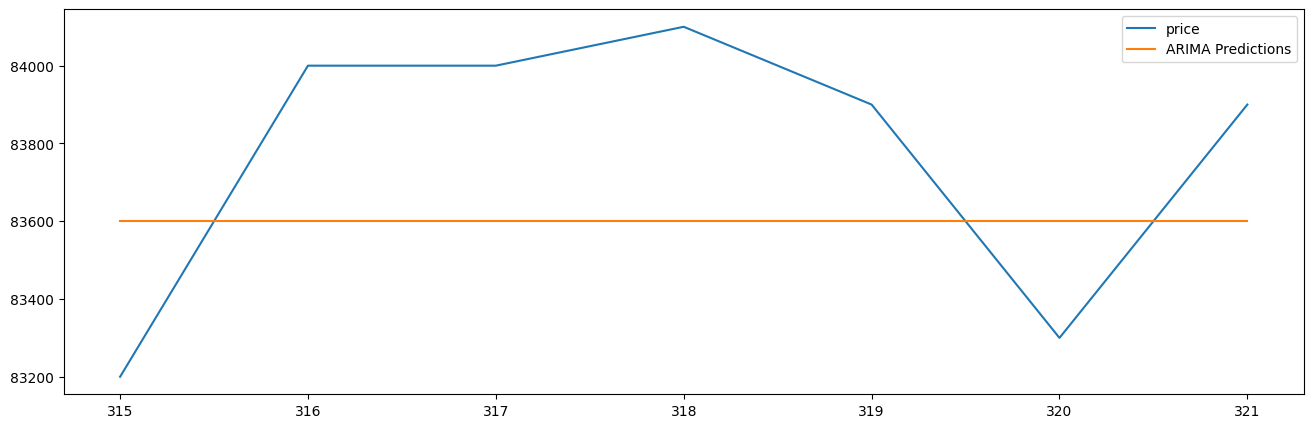

In [103]:
samsung_df_test['price'].plot(figsize = (16,5), legend=True)
forecast.plot(legend = True);

### SARIMA

In [104]:
p = range(0,3)
d = range(1,2)
q = range(0,6)
m = 24
pdq = list(itertools.product(p,d,q))
seasonal_pdq = [(x[0],x[1], x[2], m) for x in list(itertools.product(p,d,q))]

aic = []
params = []

with tqdm(total = len(pdq) * len(seasonal_pdq)) as pg:
    for i in pdq:
        for j in seasonal_pdq:
            pg.update(1)
            try:
                model = SARIMAX(samsung_df_train["price"], order=(i), season_order = (j))
                model_fit = model.fit()
                aic.append(round(model_fit.aic,2))
                params.append((i,j))
            except:
                continue

  0%|          | 0/324 [00:00<?, ?it/s] This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
  7%|▋         | 24/324 [00:00<00:01, 231.10it/s] This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.51112D+00    |proj g|=  2.57359D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      0      1      0     0     0   2.574D-06   8.511D+00
  F =   8.5111151124504829     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.5

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 15%|█▍        | 48/324 [00:00<00:01, 142.26it/s]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      3      5      1     0     0   1.143D-05   8.511D+00
  F =   8.5107882301088704     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.51154D+00    |proj g|=  7.18468D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 20%|██        | 65/324 [00:00<00:02, 121.35it/s] This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      3      5      1     0     0   1.244D-05   8.511D+00
  F =   8.5107366646731855     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.51199D+00    |proj g|=  9.26250D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 24%|██▍       | 79/324 [00:00<00:02, 101.15it/s] This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      4      6      1     0     0   1.030D-05   8.510D+00
  F =   8.5096294468516689     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.51111D+00    |proj g|=  8.18950D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 28%|██▊       | 90/324 [00:00<00:02, 86.29it/s]  This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      4      6      1     0     0   1.030D-05   8.510D+00
  F =   8.5096294468516689     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.51111D+00    |proj g|=  8.18950D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 31%|███       | 100/324 [00:01<00:03, 60.86it/s]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      4      6      1     0     0   7.835D-06   8.509D+00
  F =   8.5091025654695756     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.52293D+00    |proj g|=  2.75444D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 33%|███▎      | 108/324 [00:01<00:03, 54.47it/s] This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      4      6      1     0     0   7.835D-06   8.509D+00
  F =   8.5091025654695756     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.52293D+00    |proj g|=  2.75444D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 36%|███▋      | 118/324 [00:01<00:03, 61.49it/s] This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 40%|███▉      | 128/324 [00:01<00:03, 65.20it/s]

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.51096D+00    |proj g|=  2.14193D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      2      4      1     0     0   2.566D-06   8.511D+00
  F =   8.5108857965801743     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.5

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 42%|████▏     | 136/324 [00:01<00:03, 56.47it/s] This problem is unconstrained.



At iterate   10    f=  8.50875D+00    |proj g|=  1.96511D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     13     20      1     0     0   1.143D-05   8.509D+00
  F =   8.5087437777571360     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.51052D+00    |proj g|=  3.90929D-03

At iterate    5    f=  8.51051D+00    |proj g|=  4.64122D-03

At iterate   10    f=  8.50875D+00    |proj g|=  1.96511D-03

       

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 44%|████▍     | 143/324 [00:01<00:03, 52.33it/s] This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 46%|████▌     | 149/324 [00:02<00:03, 53.67it/s]


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     13     20      1     0     0   1.143D-05   8.509D+00
  F =   8.5087437777571360     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.51052D+00    |proj g|=  3.90929D-03

At iterate    5    f=  8.51051D+00    |proj g|=  4.64122D-03

At iterate   10    f=  8.50875D+00    |proj g|=  1.96511D-03

           * * *

Tit   = total number of iterations
Tnf   = total nu

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 48%|████▊     | 156/324 [00:02<00:02, 57.30it/s] This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 51%|█████     | 164/324 [00:02<00:02, 61.67it/s]


At iterate    5    f=  8.51081D+00    |proj g|=  1.22929D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      5      7      1     0     0   1.229D-05   8.511D+00
  F =   8.5108120434173866     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.51431D+00    |proj g|=  9.95745D-02

At iterate    5    f=  8.51081D+00    |proj g|=  1.22929D-05

           * * *

Tit   = total number of iterations
Tnf   = total nu

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 53%|█████▎    | 171/324 [00:02<00:02, 58.00it/s] This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 55%|█████▍    | 178/324 [00:02<00:02, 60.20it/s]

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.51209D+00    |proj g|=  7.18680D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      4      6      1     0     0   1.665D-05   8.511D+00
  F =   8.5107944029162823     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.5

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      4      6      1     0     0   1.665D-05   8.511D+00
  F =   8.5107944029162823     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.51209D+00    |proj g|=  7.18680D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 57%|█████▋    | 185/324 [00:02<00:03, 36.75it/s] This problem is unconstrained.


At iterate   10    f=  8.50825D+00    |proj g|=  2.36462D-02

At iterate   15    f=  8.50756D+00    |proj g|=  1.14562D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     18     35      1     0     0   1.565D-05   8.508D+00
  F =   8.5075627272199608     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.50998D+00    |proj g|=  9.23375D-02

At iterate    5    f=  8.50866D+00    |proj g|=  2.87357D-03

At itera


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   10    f=  8.50825D+00    |proj g|=  2.36462D-02

At iterate   15    f=  8.50756D+00    |proj g|=  1.14562D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     18     35      1     0     0   1.565D-05   8.508D+00
  F =   8.5075627272199608     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.50998D+00    |proj g|=  9.23375D-02

At iterate    5    f=  8.50866D+00    |proj g|=  2.87357D-03

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 59%|█████▊    | 190/324 [00:03<00:05, 23.29it/s] This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     18     35      1     0     0   1.565D-05   8.508D+00
  F =   8.5075627272199608     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.50998D+00    |proj g|=  9.23375D-02

At iterate    5    f=  8.50866D+00    |proj g|=  2.87357D-03

At iterate   10    f=  8.50825D+00    |proj g|=  2.36462D-02

At iterate   15    f=  8.50756D+00    |proj g|=  1.14562D-03

       

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 60%|█████▉    | 194/324 [00:03<00:06, 20.23it/s] This problem is unconstrained.



At iterate   10    f=  8.50825D+00    |proj g|=  2.36462D-02

At iterate   15    f=  8.50756D+00    |proj g|=  1.14562D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     18     35      1     0     0   1.565D-05   8.508D+00
  F =   8.5075627272199608     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.50998D+00    |proj g|=  9.23375D-02

At iterate    5    f=  8.50866D+00    |proj g|=  2.87357D-03

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     18     35      1     0     0   1.565D-05   8.508D+00
  F =   8.5075627272199608     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.50998D+00    |proj g|=  9.23375D-02

At iterate    5    f=  8.50866D+00    |proj g|=  2.87357D-03

At iterate   10    f=  8.50825D+00    |proj g|=  2.36462D-02

At iterate   15    f=  8.50756D+00    |proj g|=  1.14562D-03

       

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 61%|██████    | 198/324 [00:04<00:07, 17.15it/s] This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.50998D+00    |proj g|=  9.23375D-02

At iterate    5    f=  8.50866D+00    |proj g|=  2.87357D-03

At iterate   10    f=  8.50825D+00    |proj g|=  2.36462D-02

At iterate   15    f=  8.50756D+00    |proj g|=  1.14562D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     18     35      1     0     0   1.565D-05   8.508D+00
  F =   8.5075627272199608     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING 

 This problem is unconstrained.
 This problem is unconstrained.
 62%|██████▏   | 201/324 [00:04<00:07, 16.15it/s] This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     19     21      1     0     0   1.015D-05   8.508D+00
  F =   8.5075456466676194     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.52312D+00    |proj g|=  2.80146D-01

At iterate    5    f=  8.50902D+00    |proj g|=  5.45721D-04

At iterate   10    f=  8.50897D+00    |proj g|=  1.59472D-02

At iterate   15    f=  8.50755D+00    |proj g|=  3.81284D-03

       

 This problem is unconstrained.
 This problem is unconstrained.
 63%|██████▎   | 204/324 [00:04<00:08, 14.67it/s] This problem is unconstrained.



At iterate   10    f=  8.50897D+00    |proj g|=  1.59472D-02

At iterate   15    f=  8.50755D+00    |proj g|=  3.81284D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     19     21      1     0     0   1.015D-05   8.508D+00
  F =   8.5075456466676194     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.52312D+00    |proj g|=  2.80146D-01

At iterate    5    f=  8.50902D+00    |proj g|=  5.45721D-04

At iter

 This problem is unconstrained.
 64%|██████▎   | 206/324 [00:04<00:08, 14.57it/s] This problem is unconstrained.



At iterate   15    f=  8.50755D+00    |proj g|=  3.81284D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     19     21      1     0     0   1.015D-05   8.508D+00
  F =   8.5075456466676194     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.52312D+00    |proj g|=  2.80146D-01

At iterate    5    f=  8.50902D+00    |proj g|=  5.45721D-04

At iterate   10    f=  8.50897D+00    |proj g|=  1.59472D-02

At iter

 This problem is unconstrained.
 64%|██████▍   | 208/324 [00:04<00:08, 14.45it/s] This problem is unconstrained.
 This problem is unconstrained.
 65%|██████▍   | 210/324 [00:04<00:08, 14.17it/s]


At iterate   15    f=  8.50755D+00    |proj g|=  3.81284D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     19     21      1     0     0   1.015D-05   8.508D+00
  F =   8.5075456466676194     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.52312D+00    |proj g|=  2.80146D-01

At iterate    5    f=  8.50902D+00    |proj g|=  5.45721D-04

At iterate   10    f=  8.50897D+00    |proj g|=  1.59472D-02

At iter

 This problem is unconstrained.
 This problem is unconstrained.
 65%|██████▌   | 212/324 [00:05<00:08, 13.26it/s] This problem is unconstrained.



At iterate   10    f=  8.50897D+00    |proj g|=  1.59472D-02

At iterate   15    f=  8.50755D+00    |proj g|=  3.81284D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     19     21      1     0     0   1.015D-05   8.508D+00
  F =   8.5075456466676194     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.52312D+00    |proj g|=  2.80146D-01

At iterate    5    f=  8.50902D+00    |proj g|=  5.45721D-04

At iter

 This problem is unconstrained.
 66%|██████▌   | 214/324 [00:05<00:08, 13.35it/s] This problem is unconstrained.
 This problem is unconstrained.
 67%|██████▋   | 216/324 [00:05<00:08, 13.40it/s]


At iterate   10    f=  8.50897D+00    |proj g|=  1.59472D-02

At iterate   15    f=  8.50755D+00    |proj g|=  3.81284D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     19     21      1     0     0   1.015D-05   8.508D+00
  F =   8.5075456466676194     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.52312D+00    |proj g|=  2.80146D-01

At iterate    5    f=  8.50902D+00    |proj g|=  5.45721D-04

At iter

 This problem is unconstrained.
 This problem is unconstrained.
 67%|██████▋   | 218/324 [00:05<00:08, 12.88it/s] This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 70%|██████▉   | 226/324 [00:05<00:03, 26.11it/s]


At iterate   10    f=  8.50897D+00    |proj g|=  1.59472D-02

At iterate   15    f=  8.50755D+00    |proj g|=  3.81284D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     19     21      1     0     0   1.015D-05   8.508D+00
  F =   8.5075456466676194     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.51169D+00    |proj g|=  7.64367D-02

           * * *

Tit   = total number of iterations
Tnf   = total nu

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 72%|███████▏  | 234/324 [00:05<00:02, 37.84it/s] This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 75%|███████▍  | 242/324 [00:05<00:01, 47.93it/s] This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.51169D+00    |proj g|=  7.64367D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      3      6      1     0     0   2.566D-05   8.511D+00
  F =   8.5107326787209452     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.5

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 77%|███████▋  | 251/324 [00:06<00:01, 58.52it/s] This problem is unconstrained.
 This problem is unconstrained.
/Users/dongjoon/opt/anaconda3/envs/Tobigs/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/dongjoon/opt/anaconda3/envs/Tobigs/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
 This problem is unconstrained.
/Users/dongjoon/opt/anaconda3/envs/Tobigs/lib/python3.9/site


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      4      6      1     0     0   1.850D-04   8.511D+00
  F =   8.5107330148007190     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.51165D+00    |proj g|=  7.31966D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates

/Users/dongjoon/opt/anaconda3/envs/Tobigs/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/dongjoon/opt/anaconda3/envs/Tobigs/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
 This problem is unconstrained.
/Users/dongjoon/opt/anaconda3/envs/Tobigs/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/dongjoon/opt/anaconda3/envs/Tobigs/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting M

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.51115D+00    |proj g|=  3.85936D-02

At iterate    5    f=  8.51072D+00    |proj g|=  1.23460D-02

At iterate   10    f=  8.50869D+00    |proj g|=  3.64836D-04

At iterate   15    f=  8.50869D+00    |proj g|=  3.80067D-04

At iterate   20    f=  8.50855D+00    |proj g|=  6.54336D-03

At iterate   25    f=  8.50837D+00    |proj g|=  9.26845D-04

At iterate   30    f=  8.50835D+00    |proj g|=  1.38478D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

 80%|███████▉  | 258/324 [00:06<00:01, 33.79it/s]/Users/dongjoon/opt/anaconda3/envs/Tobigs/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/dongjoon/opt/anaconda3/envs/Tobigs/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
 This problem is unconstrained.
/Users/dongjoon/opt/anaconda3/envs/Tobigs/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/dongjoon/opt/anaconda3/envs/Tobigs/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarim

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.51115D+00    |proj g|=  3.85936D-02

At iterate    5    f=  8.51072D+00    |proj g|=  1.23460D-02

At iterate   10    f=  8.50869D+00    |proj g|=  3.64836D-04

At iterate   15    f=  8.50869D+00    |proj g|=  3.80067D-04

At iterate   20    f=  8.50855D+00    |proj g|=  6.54336D-03

At iterate   25    f=  8.50837D+00    |proj g|=  9.26845D-04

At iterate   30    f=  8.50835D+00    |proj g|=  1.38478D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

/Users/dongjoon/opt/anaconda3/envs/Tobigs/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/dongjoon/opt/anaconda3/envs/Tobigs/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
 This problem is unconstrained.
/Users/dongjoon/opt/anaconda3/envs/Tobigs/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/dongjoon/opt/anaconda3/envs/Tobigs/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting M


At iterate   25    f=  8.50837D+00    |proj g|=  9.26845D-04

At iterate   30    f=  8.50835D+00    |proj g|=  1.38478D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     30     44      1     0     0   1.385D-05   8.508D+00
  F =   8.5083504627030511     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.51115D+00    |proj g|=  3.85936D-02

At iterate    5    f=  8.51072D+00    |proj g|=  1.23460D-02

At iter

/Users/dongjoon/opt/anaconda3/envs/Tobigs/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/dongjoon/opt/anaconda3/envs/Tobigs/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
 This problem is unconstrained.
 81%|████████▏ | 264/324 [00:06<00:02, 23.13it/s]/Users/dongjoon/opt/anaconda3/envs/Tobigs/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/dongjoon/opt/anaconda3/envs/Tobigs/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarim


At iterate   10    f=  8.50869D+00    |proj g|=  3.64836D-04

At iterate   15    f=  8.50869D+00    |proj g|=  3.80067D-04

At iterate   20    f=  8.50855D+00    |proj g|=  6.54336D-03

At iterate   25    f=  8.50837D+00    |proj g|=  9.26845D-04

At iterate   30    f=  8.50835D+00    |proj g|=  1.38478D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     30     44      1     0     0   1.385D-05   8.508D+00
  F =   8.5083504627030511     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

/Users/dongjoon/opt/anaconda3/envs/Tobigs/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/dongjoon/opt/anaconda3/envs/Tobigs/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
 This problem is unconstrained.
/Users/dongjoon/opt/anaconda3/envs/Tobigs/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/dongjoon/opt/anaconda3/envs/Tobigs/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting M


At iterate    5    f=  8.51072D+00    |proj g|=  1.23460D-02

At iterate   10    f=  8.50869D+00    |proj g|=  3.64836D-04

At iterate   15    f=  8.50869D+00    |proj g|=  3.80067D-04

At iterate   20    f=  8.50855D+00    |proj g|=  6.54336D-03

At iterate   25    f=  8.50837D+00    |proj g|=  9.26845D-04

At iterate   30    f=  8.50835D+00    |proj g|=  1.38478D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     30     44      1     0     0   1.385D-05   8.508D+00
  F =   8.5083504627030511     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machin

/Users/dongjoon/opt/anaconda3/envs/Tobigs/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/dongjoon/opt/anaconda3/envs/Tobigs/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
 This problem is unconstrained.
/Users/dongjoon/opt/anaconda3/envs/Tobigs/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/dongjoon/opt/anaconda3/envs/Tobigs/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting M


At iterate   10    f=  8.50869D+00    |proj g|=  3.64836D-04

At iterate   15    f=  8.50869D+00    |proj g|=  3.80067D-04

At iterate   20    f=  8.50855D+00    |proj g|=  6.54336D-03

At iterate   25    f=  8.50837D+00    |proj g|=  9.26845D-04

At iterate   30    f=  8.50835D+00    |proj g|=  1.38478D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     30     44      1     0     0   1.385D-05   8.508D+00
  F =   8.5083504627030511     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

/Users/dongjoon/opt/anaconda3/envs/Tobigs/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/dongjoon/opt/anaconda3/envs/Tobigs/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
 This problem is unconstrained.
/Users/dongjoon/opt/anaconda3/envs/Tobigs/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/dongjoon/opt/anaconda3/envs/Tobigs/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting M

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.51113D+00    |proj g|=  3.87148D-02

At iterate    5    f=  8.51069D+00    |proj g|=  7.91591D-04

At iterate   10    f=  8.51050D+00    |proj g|=  4.06122D-02

At iterate   15    f=  8.50866D+00    |proj g|=  8.77326D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     19     23      1     0     0   3.079D-05   8.509D+00
  F =   8.5086039549263663     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING 

 86%|████████▌ | 278/324 [00:07<00:02, 19.52it/s]/Users/dongjoon/opt/anaconda3/envs/Tobigs/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/dongjoon/opt/anaconda3/envs/Tobigs/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
 This problem is unconstrained.
/Users/dongjoon/opt/anaconda3/envs/Tobigs/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/dongjoon/opt/anaconda3/envs/Tobigs/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarim


At iterate   15    f=  8.50866D+00    |proj g|=  8.77326D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     19     23      1     0     0   3.079D-05   8.509D+00
  F =   8.5086039549263663     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.51113D+00    |proj g|=  3.87148D-02

At iterate    5    f=  8.51069D+00    |proj g|=  7.91591D-04

At iterate   10    f=  8.51050D+00    |proj g|=  4.06122D-02

At iter

/Users/dongjoon/opt/anaconda3/envs/Tobigs/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/dongjoon/opt/anaconda3/envs/Tobigs/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
 This problem is unconstrained.
/Users/dongjoon/opt/anaconda3/envs/Tobigs/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/dongjoon/opt/anaconda3/envs/Tobigs/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting M


At iterate    5    f=  8.51069D+00    |proj g|=  7.91591D-04

At iterate   10    f=  8.51050D+00    |proj g|=  4.06122D-02

At iterate   15    f=  8.50866D+00    |proj g|=  8.77326D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     19     23      1     0     0   3.079D-05   8.509D+00
  F =   8.5086039549263663     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.51113D+00    |proj g|=  3.87148D-02

At iter

/Users/dongjoon/opt/anaconda3/envs/Tobigs/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/dongjoon/opt/anaconda3/envs/Tobigs/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
 This problem is unconstrained.
 89%|████████▊ | 287/324 [00:08<00:01, 20.01it/s]/Users/dongjoon/opt/anaconda3/envs/Tobigs/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/dongjoon/opt/anaconda3/envs/Tobigs/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarim

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.51113D+00    |proj g|=  3.87148D-02

At iterate    5    f=  8.51069D+00    |proj g|=  7.91591D-04

At iterate   10    f=  8.51050D+00    |proj g|=  4.06122D-02

At iterate   15    f=  8.50866D+00    |proj g|=  8.77326D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     19     23      1     0     0   3.079D-05   8.509D+00
  F =   8.5086039549263663     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING 

/Users/dongjoon/opt/anaconda3/envs/Tobigs/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 90%|████████▉ | 290/324 [00:08<00:02, 16.04it/s] This problem is unconstrained.



At iterate   20    f=  8.50764D+00    |proj g|=  4.46965D-04

At iterate   25    f=  8.50763D+00    |proj g|=  1.75611D-03

At iterate   30    f=  8.50751D+00    |proj g|=  1.39588D-02

At iterate   35    f=  8.50690D+00    |proj g|=  8.48953D-03

At iterate   40    f=  8.50285D+00    |proj g|=  5.73223D-02

At iterate   45    f=  8.50007D+00    |proj g|=  2.16954D-02

At iterate   50    f=  8.49951D+00    |proj g|=  1.44995D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     67      1     0     0   1.450D-03   8.500D+00
  F =   8.4995070672472117     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT       

/Users/dongjoon/opt/anaconda3/envs/Tobigs/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   20    f=  8.50764D+00    |proj g|=  4.46965D-04

At iterate   25    f=  8.50763D+00    |proj g|=  1.75611D-03

At iterate   30    f=  8.50751D+00    |proj g|=  1.39588D-02

At iterate   35    f=  8.50690D+00    |proj g|=  8.48953D-03

At iterate   40    f=  8.50285D+00    |proj g|=  5.73223D-02

At iterate   45    f=  8.50007D+00    |proj g|=  2.16954D-02

At iterate   50    f=  8.49951D+00    |proj g|=  1.44995D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     67      1     0     0   1.450D-03   8.500D+00
  F =   8.4995070672472117     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT       

 This problem is unconstrained.
/Users/dongjoon/opt/anaconda3/envs/Tobigs/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 90%|█████████ | 292/324 [00:08<00:02, 10.98it/s] This problem is unconstrained.



At iterate   35    f=  8.50690D+00    |proj g|=  8.48953D-03

At iterate   40    f=  8.50285D+00    |proj g|=  5.73223D-02

At iterate   45    f=  8.50007D+00    |proj g|=  2.16954D-02

At iterate   50    f=  8.49951D+00    |proj g|=  1.44995D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     67      1     0     0   1.450D-03   8.500D+00
  F =   8.4995070672472117     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iter

/Users/dongjoon/opt/anaconda3/envs/Tobigs/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 This problem is unconstrained.
/Users/dongjoon/opt/anaconda3/envs/Tobigs/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 91%|█████████ | 294/324 [00:09<00:03,  8.89it/s]


At iterate    5    f=  8.51020D+00    |proj g|=  1.07564D-03

At iterate   10    f=  8.51009D+00    |proj g|=  2.11247D-02

At iterate   15    f=  8.50783D+00    |proj g|=  2.21873D-02

At iterate   20    f=  8.50764D+00    |proj g|=  4.46965D-04

At iterate   25    f=  8.50763D+00    |proj g|=  1.75611D-03

At iterate   30    f=  8.50751D+00    |proj g|=  1.39588D-02

At iterate   35    f=  8.50690D+00    |proj g|=  8.48953D-03

At iterate   40    f=  8.50285D+00    |proj g|=  5.73223D-02

At iterate   45    f=  8.50007D+00    |proj g|=  2.16954D-02

At iterate   50    f=  8.49951D+00    |proj g|=  1.44995D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.
/Users/dongjoon/opt/anaconda3/envs/Tobigs/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 This problem is unconstrained.



At iterate   15    f=  8.50783D+00    |proj g|=  2.21873D-02

At iterate   20    f=  8.50764D+00    |proj g|=  4.46965D-04

At iterate   25    f=  8.50763D+00    |proj g|=  1.75611D-03

At iterate   30    f=  8.50751D+00    |proj g|=  1.39588D-02

At iterate   35    f=  8.50690D+00    |proj g|=  8.48953D-03

At iterate   40    f=  8.50285D+00    |proj g|=  5.73223D-02

At iterate   45    f=  8.50007D+00    |proj g|=  2.16954D-02

At iterate   50    f=  8.49951D+00    |proj g|=  1.44995D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     67      1     0     0   1.450D-03   8.500D+00
  F =   8.49950706724

/Users/dongjoon/opt/anaconda3/envs/Tobigs/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 91%|█████████▏| 296/324 [00:09<00:03,  7.52it/s]


At iterate   25    f=  8.50763D+00    |proj g|=  1.75611D-03

At iterate   30    f=  8.50751D+00    |proj g|=  1.39588D-02

At iterate   35    f=  8.50690D+00    |proj g|=  8.48953D-03

At iterate   40    f=  8.50285D+00    |proj g|=  5.73223D-02

At iterate   45    f=  8.50007D+00    |proj g|=  2.16954D-02

At iterate   50    f=  8.49951D+00    |proj g|=  1.44995D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     67      1     0     0   1.450D-03   8.500D+00
  F =   8.4995070672472117     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.
/Users/dongjoon/opt/anaconda3/envs/Tobigs/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 92%|█████████▏| 297/324 [00:09<00:03,  7.14it/s] This problem is unconstrained.



At iterate   20    f=  8.50764D+00    |proj g|=  4.46965D-04

At iterate   25    f=  8.50763D+00    |proj g|=  1.75611D-03

At iterate   30    f=  8.50751D+00    |proj g|=  1.39588D-02

At iterate   35    f=  8.50690D+00    |proj g|=  8.48953D-03

At iterate   40    f=  8.50285D+00    |proj g|=  5.73223D-02

At iterate   45    f=  8.50007D+00    |proj g|=  2.16954D-02

At iterate   50    f=  8.49951D+00    |proj g|=  1.44995D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     67      1     0     0   1.450D-03   8.500D+00
  F =   8.4995070672472117     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT       

/Users/dongjoon/opt/anaconda3/envs/Tobigs/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 92%|█████████▏| 298/324 [00:10<00:03,  6.69it/s] This problem is unconstrained.
/Users/dongjoon/opt/anaconda3/envs/Tobigs/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 92%|█████████▏| 299/324 [00:10<00:03,  6.43it/s]


At iterate   40    f=  8.50285D+00    |proj g|=  5.73223D-02

At iterate   45    f=  8.50007D+00    |proj g|=  2.16954D-02

At iterate   50    f=  8.49951D+00    |proj g|=  1.44995D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     67      1     0     0   1.450D-03   8.500D+00
  F =   8.4995070672472117     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.51250D+00    |proj g|=  7.19757D-02

At iter

 This problem is unconstrained.
/Users/dongjoon/opt/anaconda3/envs/Tobigs/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 93%|█████████▎| 300/324 [00:10<00:03,  6.17it/s] This problem is unconstrained.



At iterate    5    f=  8.51020D+00    |proj g|=  1.07564D-03

At iterate   10    f=  8.51009D+00    |proj g|=  2.11247D-02

At iterate   15    f=  8.50783D+00    |proj g|=  2.21873D-02

At iterate   20    f=  8.50764D+00    |proj g|=  4.46965D-04

At iterate   25    f=  8.50763D+00    |proj g|=  1.75611D-03

At iterate   30    f=  8.50751D+00    |proj g|=  1.39588D-02

At iterate   35    f=  8.50690D+00    |proj g|=  8.48953D-03

At iterate   40    f=  8.50285D+00    |proj g|=  5.73223D-02

At iterate   45    f=  8.50007D+00    |proj g|=  2.16954D-02

At iterate   50    f=  8.49951D+00    |proj g|=  1.44995D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/Users/dongjoon/opt/anaconda3/envs/Tobigs/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 93%|█████████▎| 301/324 [00:10<00:04,  5.61it/s]


At iterate   25    f=  8.50763D+00    |proj g|=  1.75611D-03

At iterate   30    f=  8.50751D+00    |proj g|=  1.39588D-02

At iterate   35    f=  8.50690D+00    |proj g|=  8.48953D-03

At iterate   40    f=  8.50285D+00    |proj g|=  5.73223D-02

At iterate   45    f=  8.50007D+00    |proj g|=  2.16954D-02

At iterate   50    f=  8.49951D+00    |proj g|=  1.44995D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     67      1     0     0   1.450D-03   8.500D+00
  F =   8.4995070672472117     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.
/Users/dongjoon/opt/anaconda3/envs/Tobigs/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 93%|█████████▎| 302/324 [00:10<00:03,  5.57it/s] This problem is unconstrained.



At iterate   25    f=  8.50763D+00    |proj g|=  1.75611D-03

At iterate   30    f=  8.50751D+00    |proj g|=  1.39588D-02

At iterate   35    f=  8.50690D+00    |proj g|=  8.48953D-03

At iterate   40    f=  8.50285D+00    |proj g|=  5.73223D-02

At iterate   45    f=  8.50007D+00    |proj g|=  2.16954D-02

At iterate   50    f=  8.49951D+00    |proj g|=  1.44995D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     67      1     0     0   1.450D-03   8.500D+00
  F =   8.4995070672472117     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machin

/Users/dongjoon/opt/anaconda3/envs/Tobigs/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 94%|█████████▎| 303/324 [00:11<00:03,  5.48it/s] This problem is unconstrained.



At iterate   40    f=  8.50285D+00    |proj g|=  5.73223D-02

At iterate   45    f=  8.50007D+00    |proj g|=  2.16954D-02

At iterate   50    f=  8.49951D+00    |proj g|=  1.44995D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     67      1     0     0   1.450D-03   8.500D+00
  F =   8.4995070672472117     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.51250D+00    |proj g|=  7.19757D-02

At iter

/Users/dongjoon/opt/anaconda3/envs/Tobigs/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 94%|█████████▍| 304/324 [00:11<00:03,  5.29it/s]


At iterate   45    f=  8.50007D+00    |proj g|=  2.16954D-02

At iterate   50    f=  8.49951D+00    |proj g|=  1.44995D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     67      1     0     0   1.450D-03   8.500D+00
  F =   8.4995070672472117     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.51250D+00    |proj g|=  7.19757D-02

At iterate    5    f=  8.51020D+00    |proj g|=  1.07564D-03

At iter

 This problem is unconstrained.
/Users/dongjoon/opt/anaconda3/envs/Tobigs/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 94%|█████████▍| 305/324 [00:11<00:03,  5.09it/s] This problem is unconstrained.
/Users/dongjoon/opt/anaconda3/envs/Tobigs/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 94%|█████████▍| 306/324 [00:11<00:03,  5.24it/s] This problem is unconstrained.



At iterate   50    f=  8.49951D+00    |proj g|=  1.44995D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     67      1     0     0   1.450D-03   8.500D+00
  F =   8.4995070672472117     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.51250D+00    |proj g|=  7.19757D-02

At iterate    5    f=  8.51020D+00    |proj g|=  1.07564D-03

At iterate   10    f=  8.51009D+00    |proj g|=  2.11247D-02

At iter

/Users/dongjoon/opt/anaconda3/envs/Tobigs/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 95%|█████████▍| 307/324 [00:11<00:03,  5.28it/s] This problem is unconstrained.



At iterate    5    f=  8.51020D+00    |proj g|=  1.07564D-03

At iterate   10    f=  8.51009D+00    |proj g|=  2.11247D-02

At iterate   15    f=  8.50783D+00    |proj g|=  2.21873D-02

At iterate   20    f=  8.50764D+00    |proj g|=  4.46965D-04

At iterate   25    f=  8.50763D+00    |proj g|=  1.75611D-03

At iterate   30    f=  8.50751D+00    |proj g|=  1.39588D-02

At iterate   35    f=  8.50690D+00    |proj g|=  8.48953D-03

At iterate   40    f=  8.50285D+00    |proj g|=  5.73223D-02

At iterate   45    f=  8.50007D+00    |proj g|=  2.16954D-02

At iterate   50    f=  8.49951D+00    |proj g|=  1.44995D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 95%|█████████▌| 308/324 [00:12<00:03,  5.22it/s] This problem is unconstrained.



At iterate   20    f=  8.50753D+00    |proj g|=  3.64907D-03

At iterate   25    f=  8.50750D+00    |proj g|=  5.45570D-04

At iterate   30    f=  8.50747D+00    |proj g|=  4.90493D-03

At iterate   35    f=  8.50731D+00    |proj g|=  7.13255D-03

At iterate   40    f=  8.50726D+00    |proj g|=  1.67901D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     41     48      1     0     0   1.376D-05   8.507D+00
  F =   8.5072621126297729     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

 95%|█████████▌| 309/324 [00:12<00:03,  4.98it/s]


At iterate   30    f=  8.50747D+00    |proj g|=  4.90493D-03

At iterate   35    f=  8.50731D+00    |proj g|=  7.13255D-03

At iterate   40    f=  8.50726D+00    |proj g|=  1.67901D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     41     48      1     0     0   1.376D-05   8.507D+00
  F =   8.5072621126297729     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.52188D+00    |proj g|=  2.23582D-01

At iter

 This problem is unconstrained.
 96%|█████████▌| 310/324 [00:12<00:03,  4.59it/s] This problem is unconstrained.



At iterate   35    f=  8.50731D+00    |proj g|=  7.13255D-03

At iterate   40    f=  8.50726D+00    |proj g|=  1.67901D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     41     48      1     0     0   1.376D-05   8.507D+00
  F =   8.5072621126297729     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.52188D+00    |proj g|=  2.23582D-01

At iterate    5    f=  8.50983D+00    |proj g|=  8.45400D-04

At iter

 96%|█████████▌| 311/324 [00:12<00:02,  4.46it/s]


At iterate   40    f=  8.50726D+00    |proj g|=  1.67901D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     41     48      1     0     0   1.376D-05   8.507D+00
  F =   8.5072621126297729     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.52188D+00    |proj g|=  2.23582D-01

At iterate    5    f=  8.50983D+00    |proj g|=  8.45400D-04

At iterate   10    f=  8.50980D+00    |proj g|=  1.00320D-02

At iter

 This problem is unconstrained.
 97%|█████████▋| 313/324 [00:13<00:02,  4.69it/s]

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.52188D+00    |proj g|=  2.23582D-01

At iterate    5    f=  8.50983D+00    |proj g|=  8.45400D-04

At iterate   10    f=  8.50980D+00    |proj g|=  1.00320D-02

At iterate   15    f=  8.50856D+00    |proj g|=  4.80988D-02

At iterate   20    f=  8.50753D+00    |proj g|=  3.64907D-03

At iterate   25    f=  8.50750D+00    |proj g|=  5.45570D-04

At iterate   30    f=  8.50747D+00    |proj g|=  4.90493D-03

At iterate   35    f=  8.50731D+00    |proj g|=  7.13255D-03

At iterate   40    f=  8.50726D+00    |proj g|=  1.67901D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg 

 This problem is unconstrained.
 97%|█████████▋| 314/324 [00:13<00:02,  4.67it/s]


At iterate    5    f=  8.50983D+00    |proj g|=  8.45400D-04

At iterate   10    f=  8.50980D+00    |proj g|=  1.00320D-02

At iterate   15    f=  8.50856D+00    |proj g|=  4.80988D-02

At iterate   20    f=  8.50753D+00    |proj g|=  3.64907D-03

At iterate   25    f=  8.50750D+00    |proj g|=  5.45570D-04

At iterate   30    f=  8.50747D+00    |proj g|=  4.90493D-03

At iterate   35    f=  8.50731D+00    |proj g|=  7.13255D-03

At iterate   40    f=  8.50726D+00    |proj g|=  1.67901D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     41     48      1     0     0   1.376D-05   8.507D+00
  F =   8.50726211262

 This problem is unconstrained.
 97%|█████████▋| 315/324 [00:13<00:02,  4.35it/s]


At iterate   15    f=  8.50856D+00    |proj g|=  4.80988D-02

At iterate   20    f=  8.50753D+00    |proj g|=  3.64907D-03

At iterate   25    f=  8.50750D+00    |proj g|=  5.45570D-04

At iterate   30    f=  8.50747D+00    |proj g|=  4.90493D-03

At iterate   35    f=  8.50731D+00    |proj g|=  7.13255D-03

At iterate   40    f=  8.50726D+00    |proj g|=  1.67901D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     41     48      1     0     0   1.376D-05   8.507D+00
  F =   8.5072621126297729     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.
 98%|█████████▊| 316/324 [00:13<00:01,  4.57it/s] This problem is unconstrained.



At iterate    5    f=  8.50983D+00    |proj g|=  8.45400D-04

At iterate   10    f=  8.50980D+00    |proj g|=  1.00320D-02

At iterate   15    f=  8.50856D+00    |proj g|=  4.80988D-02

At iterate   20    f=  8.50753D+00    |proj g|=  3.64907D-03

At iterate   25    f=  8.50750D+00    |proj g|=  5.45570D-04

At iterate   30    f=  8.50747D+00    |proj g|=  4.90493D-03

At iterate   35    f=  8.50731D+00    |proj g|=  7.13255D-03

At iterate   40    f=  8.50726D+00    |proj g|=  1.67901D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     41     48      1     0     0   1.376D-05   8.507D+00
  F =   8.50726211262

 98%|█████████▊| 317/324 [00:14<00:01,  4.68it/s] This problem is unconstrained.



At iterate   10    f=  8.50980D+00    |proj g|=  1.00320D-02

At iterate   15    f=  8.50856D+00    |proj g|=  4.80988D-02

At iterate   20    f=  8.50753D+00    |proj g|=  3.64907D-03

At iterate   25    f=  8.50750D+00    |proj g|=  5.45570D-04

At iterate   30    f=  8.50747D+00    |proj g|=  4.90493D-03

At iterate   35    f=  8.50731D+00    |proj g|=  7.13255D-03

At iterate   40    f=  8.50726D+00    |proj g|=  1.67901D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     41     48      1     0     0   1.376D-05   8.507D+00
  F =   8.5072621126297729     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 98%|█████████▊| 318/324 [00:14<00:01,  4.74it/s] This problem is unconstrained.



At iterate   15    f=  8.50856D+00    |proj g|=  4.80988D-02

At iterate   20    f=  8.50753D+00    |proj g|=  3.64907D-03

At iterate   25    f=  8.50750D+00    |proj g|=  5.45570D-04

At iterate   30    f=  8.50747D+00    |proj g|=  4.90493D-03

At iterate   35    f=  8.50731D+00    |proj g|=  7.13255D-03

At iterate   40    f=  8.50726D+00    |proj g|=  1.67901D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     41     48      1     0     0   1.376D-05   8.507D+00
  F =   8.5072621126297729     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 98%|█████████▊| 319/324 [00:14<00:01,  4.31it/s]


At iterate    5    f=  8.50983D+00    |proj g|=  8.45400D-04

At iterate   10    f=  8.50980D+00    |proj g|=  1.00320D-02

At iterate   15    f=  8.50856D+00    |proj g|=  4.80988D-02

At iterate   20    f=  8.50753D+00    |proj g|=  3.64907D-03

At iterate   25    f=  8.50750D+00    |proj g|=  5.45570D-04

At iterate   30    f=  8.50747D+00    |proj g|=  4.90493D-03

At iterate   35    f=  8.50731D+00    |proj g|=  7.13255D-03

At iterate   40    f=  8.50726D+00    |proj g|=  1.67901D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     41     48      1     0     0   1.376D-05   8.507D+00
  F =   8.50726211262

 This problem is unconstrained.
 99%|█████████▉| 320/324 [00:14<00:00,  4.32it/s]


At iterate    5    f=  8.50983D+00    |proj g|=  8.45400D-04

At iterate   10    f=  8.50980D+00    |proj g|=  1.00320D-02

At iterate   15    f=  8.50856D+00    |proj g|=  4.80988D-02

At iterate   20    f=  8.50753D+00    |proj g|=  3.64907D-03

At iterate   25    f=  8.50750D+00    |proj g|=  5.45570D-04

At iterate   30    f=  8.50747D+00    |proj g|=  4.90493D-03

At iterate   35    f=  8.50731D+00    |proj g|=  7.13255D-03

At iterate   40    f=  8.50726D+00    |proj g|=  1.67901D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     41     48      1     0     0   1.376D-05   8.507D+00
  F =   8.50726211262

 This problem is unconstrained.
 99%|█████████▉| 321/324 [00:14<00:00,  4.53it/s] This problem is unconstrained.



At iterate   10    f=  8.50980D+00    |proj g|=  1.00320D-02

At iterate   15    f=  8.50856D+00    |proj g|=  4.80988D-02

At iterate   20    f=  8.50753D+00    |proj g|=  3.64907D-03

At iterate   25    f=  8.50750D+00    |proj g|=  5.45570D-04

At iterate   30    f=  8.50747D+00    |proj g|=  4.90493D-03

At iterate   35    f=  8.50731D+00    |proj g|=  7.13255D-03

At iterate   40    f=  8.50726D+00    |proj g|=  1.67901D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     41     48      1     0     0   1.376D-05   8.507D+00
  F =   8.5072621126297729     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 99%|█████████▉| 322/324 [00:15<00:00,  4.58it/s]


At iterate   25    f=  8.50750D+00    |proj g|=  5.45570D-04

At iterate   30    f=  8.50747D+00    |proj g|=  4.90493D-03

At iterate   35    f=  8.50731D+00    |proj g|=  7.13255D-03

At iterate   40    f=  8.50726D+00    |proj g|=  1.67901D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     41     48      1     0     0   1.376D-05   8.507D+00
  F =   8.5072621126297729     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.
100%|█████████▉| 323/324 [00:15<00:00,  4.34it/s]


At iterate   20    f=  8.50753D+00    |proj g|=  3.64907D-03

At iterate   25    f=  8.50750D+00    |proj g|=  5.45570D-04

At iterate   30    f=  8.50747D+00    |proj g|=  4.90493D-03

At iterate   35    f=  8.50731D+00    |proj g|=  7.13255D-03

At iterate   40    f=  8.50726D+00    |proj g|=  1.67901D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     41     48      1     0     0   1.376D-05   8.507D+00
  F =   8.5072621126297729     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

 This problem is unconstrained.
100%|██████████| 324/324 [00:15<00:00,  4.40it/s] This problem is unconstrained.


At iterate   15    f=  8.50856D+00    |proj g|=  4.80988D-02

At iterate   20    f=  8.50753D+00    |proj g|=  3.64907D-03

At iterate   25    f=  8.50750D+00    |proj g|=  5.45570D-04

At iterate   30    f=  8.50747D+00    |proj g|=  4.90493D-03

At iterate   35    f=  8.50731D+00    |proj g|=  7.13255D-03

At iterate   40    f=  8.50726D+00    |proj g|=  1.67901D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     41     48      1     0     0   1.376D-05   8.507D+00
  F =   8.5072621126297729     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine

100%|██████████| 324/324 [00:15<00:00, 20.48it/s]


At iterate   15    f=  8.50856D+00    |proj g|=  4.80988D-02

At iterate   20    f=  8.50753D+00    |proj g|=  3.64907D-03

At iterate   25    f=  8.50750D+00    |proj g|=  5.45570D-04

At iterate   30    f=  8.50747D+00    |proj g|=  4.90493D-03

At iterate   35    f=  8.50731D+00    |proj g|=  7.13255D-03

At iterate   40    f=  8.50726D+00    |proj g|=  1.67901D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     41     48      1     0     0   1.376D-05   8.507D+00
  F =   8.5072621126297729     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


In [107]:
optimal = [(params[i],j) for i,j in enumerate(aic) if j == min(aic)]
model_opt = SARIMAX(samsung_df_train["price"], order = optimal[0][0][0], seasonal_order = optimal[0][0][1])
model_opt_fit = model_opt.fit()
model_opt_fit.summary()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.13589D+00    |proj g|=  4.97293D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      2      5      1     0     0   3.002D-06   8.134D+00
  F =   8.1342830997548070     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              price   No. Observations:                  315
Model:             SARIMAX(0, 1, 0)x(0, 1, 0, 24)   Log Likelihood               -2562.299
Date:                            Thu, 16 Mar 2023   AIC                           5126.598
Time:                                    17:50:11   BIC                           5130.268
Sample:                                         0   HQIC                          5128.069
                                            - 315                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      2.752e+06   2.11e+05     13.039      0.000    2.34e+06    3.17e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 1.24
Prob(Q):                              0.95   Prob(JB):                         0.54
Heteroskedasticity (H):               1.01   Skew:                            -0.00
Prob(H) (two-sided):                  0.95   Kurtosis:                         3.32
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [109]:
model = SARIMAX(samsung_df_train["price"], order=optimal[0][0][0], seasonal_order=optimal[0][0][1])
model_fit = model.fit(disp=0)
forecast = model_fit.predict(start=len(samsung_df_train), end= len(samsung_df)-1, typ="linear").rename("SARIMA Predictions")


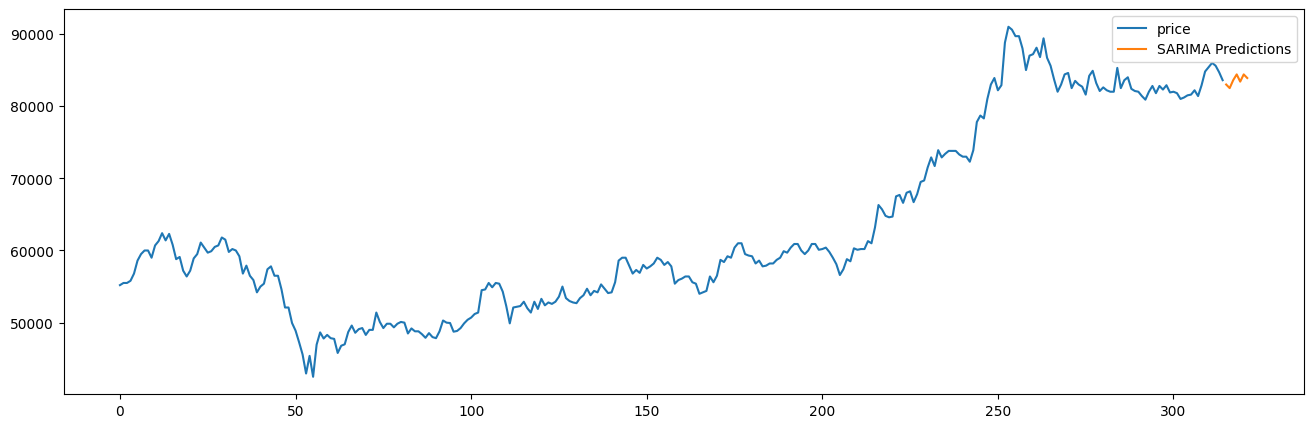

In [111]:
samsung_df_train['price'].plot(figsize = (16,5), legend=True)
forecast.plot(legend = True);

<AxesSubplot: >

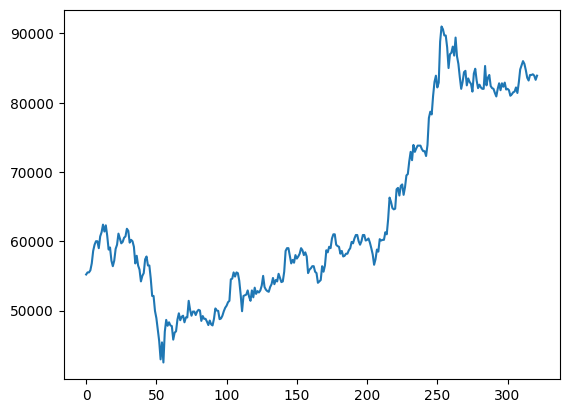

In [116]:
samsung_df.price.plot()